<a href="https://colab.research.google.com/github/talaricoferreira/exercicios_ciencia_dados_usp/blob/master/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercicio 1

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
random.seed(2016) # define the seed (important to reproduce the results)

#data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/BreastCancer.csv', header=(0))
#data = pd.read_csv('/content/diabetes.csv', header=(0))
data = pd.read_csv('/content/heart.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]))  

nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol, "Classes:", classes)
attributes = list(data.columns)
data.head(100)

Matriz de atributos: Número de linhas: 303  colunas:  14 Classes: [1 0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


Vamos construir as variáveis $X$ e $y$, sendo que o processo classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

Convertemos os dados para o formato Numpy para facilitar a sua manipulação.

In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
print("X: ", X, "\n y:", y, "\n")

X:  [[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]] 
 y: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Vamos normalizar os dados, de modo a evitar o efeito da escala dos atributos.

In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

Vamos Exibir os Dados

In [ ]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 4.69005106e-17 -1.40701532e-16  2.34502553e-17 -7.03507659e-16
 -1.11388713e-16 -2.34502553e-17  1.46564096e-16 -6.80057404e-16
 -4.69005106e-17  2.34502553e-17 -1.40701532e-16 -2.34502553e-17
 -1.64151787e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [ ]:
from sklearn.model_selection import train_test_split
p = 0.8 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)
print(y_train)

[1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1.]


###Classificador Bayesiano
Vamos considerar o caso paramétrico, assumindo que cada variável está distribuída de acordo com uma distribuição Normal. Outras distribuições também podem ser utilizadas.

Já selecionamos os conjuntos de treinamento e teste anteriormente. No conjunto de treinamento, vamos calcular a média e desvio padrão de cada atributo para cada classe. A seguir, reaizamos a classificação, dos dados usando a teoria da decisão Bayesiana, isto é: $X \in C_i$ se, e somente se, $P(C_i|X) = \max P(C_j|X)$ para todo $j$.

In [ ]:
from scipy.stats import multivariate_normal

#matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) #fraction of elements in each class
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i] ))
    elements = elements[0]
    Pc[i] = len(elements)/len(y_train)
    #print("\n Pc[i]: ",Pc[i])
    #print("\n Tamanho:",len(elements))
    Z = x_train[elements,:]
    #print("\n Z:",Z)
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        #print(x,"\n")
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]
        
#print(P)

Selecionando qual Classe pertence

In [ ]:
y_pred = []
#np.array(test_x.shape[0], dtype=str)
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred)
print(y_pred)

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0]


Testa a Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.8360655737704918


Para o Modo não Parametrico:

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score

# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    elements =elements[0]
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]
        
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.8688524590163934


Utilizando o Metodo Naive-Beyes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8688524590163934


Concluimos assim que para esses dados e separando 80% da base para treinamento a classificação que alcança a melhor acuracia a Baysiana não-parametrica com h=2

##Exercicio 2


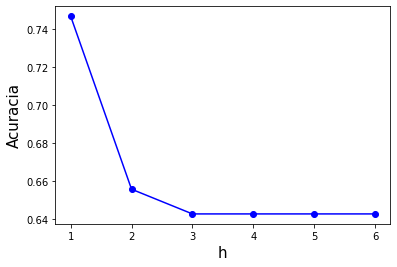

Melhor h: 1


In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score

random.seed(42)
#data = pd.read_csv('data/Iris.csv', header=(0))
data = pd.read_csv('/content/diabetes.csv', header=(0))

classes = np.array(pd.unique(data[data.columns[-1]]))  

# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
vh = []
hscore =[]
for h in range(1,7): # para cada h - Feitos teste não há mais variações de acuracia com h>6
    for i in np.arange(0, len(classes)): # Para cada classe
        elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
        elements = elements[0]
        #print(len(elements[0]))
        Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
        #print(Pc[i])
        #print(Pc[i])
        Z = x_train[elements,:] # Elementos no conjunto de treinamento
        #print(Z)
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]
        
    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        #print(classes[c])
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
    #print('\n h:', h, 'accurace:', score)
    hscore.append(score)
    vh.append(h)
plt.figure(figsize=(6,4))
plt.plot(vh, hscore, '-bo')
plt.xlabel('h', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show(True)
best_k = np.argmax(hscore)+1
print('Melhor h:', best_k)

Nota-se que para h maior que 3 não há variação na acurácia do modelo. E o Hiperparametro que retorna a maior acurácia é h=1

### Exercicio 3

<Figure size 432x288 with 0 Axes>

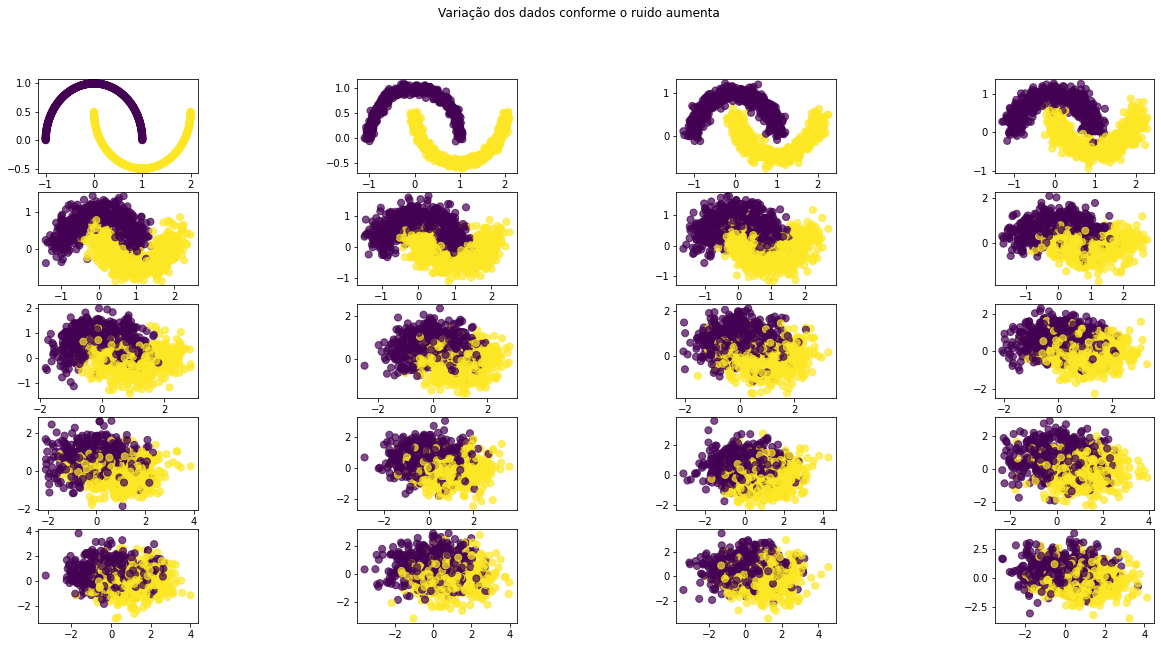

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
noises =[]
i=0
X=[]
y=[]
for noise in np.arange(0, 1, 0.05):
  data = datasets.make_moons(n_samples=n_samples, noise=noise)
  X.append(data[0])
  y.append(data[1])
  noises.append(noise)
  
  i=i+1

i=0
fig,asato = plt.subplots(nrows=5, ncols=4, figsize=(20,10))
fig.suptitle('Variação dos dados conforme o ruido aumenta')
#grid = fig.add_gridspec(4, 5, hspace=0, wspace=0) 
for i in range (0,20):
  #print(i)
  #print(i//4, i%4)
  asato[i//4, i%4].scatter(X[i][:,0], X[i][:,1], c=y[i], cmap='viridis', s=50, alpha=0.7)
      #axs[j,w].scatter(X[i][:,0], X[i][:,1], c=y[i], cmap='viridis', s=50, alpha=0.7)

plt.subplots_adjust(wspace=1)
plt.show(True)
#print(data)
# Converte para matriz e vetor do numpy
data1=pd.DataFrame(data[0])
#print(data1)
classes = np.array(pd.unique(data[data1.columns[-1]]))  

#print(classes)
#print(len(classes))

Separando os dados para treinamento:

In [ ]:
vx_train=[]
vx_test=[]
vy_train=[]
vy_test=[]
vP=[]
vPc=[]
X = np.asarray(X)
y = np.asarray(y)
print(X)
for i in range(0,len(noises)):
  # Transforma os dados para terem media igual a zero e variancia igual a 1
  scaler = StandardScaler().fit(X[i])
  X[i] = scaler.transform(X[i])
  #print(X[)
  # Seleciona os conjuntos de treinamento e teste
  p = 0.8 # fraction of elements in the training set
  x_train, x_test, y_train, y_test = train_test_split(X[i], y[i], train_size = p, random_state = 402)
  vx_train.append(x_train)
  vx_test.append(x_test)
  vy_train.append(y_train)
  vy_test.append(y_test)
  # Matriz que armazena as probabilidades para cada classe
  P = pd.DataFrame(data=np.zeros((x_test.shape[0], 2)), columns = classes) 
  vP.append(P)
  Pc = np.zeros(2) # Armaze a fracao de elementos em cada classe
  vPc.append(Pc)
  #print(P)
 

[[[ 1.40654492 -0.41363079]
  [ 0.54236709 -0.38914122]
  [ 1.95468484  0.20238136]
  ...
  [-0.99950458  0.03147369]
  [-0.97151846  0.23696388]
  [ 0.01662103  0.31843514]]

 [[-0.32746977  0.90318391]
  [ 1.88992759  0.14334453]
  [ 1.55429481 -0.32398736]
  ...
  [-0.00926892  0.27405904]
  [ 0.9923658   0.30764481]
  [-0.66025509  0.76000338]]

 [[ 0.91074054  0.54307684]
  [-0.24607728  0.98589171]
  [ 0.05926408  0.08289475]
  ...
  [-1.0320421   0.1846695 ]
  [-0.08946557  0.94946312]
  [-0.36471553  1.10867371]]

 ...

 [[ 0.41047227  0.36804885]
  [ 0.38395027 -0.4764277 ]
  [-1.2892992   1.4225273 ]
  ...
  [ 1.31106416  1.16750355]
  [-0.45279947 -0.88933413]
  [ 1.87028457 -1.4203183 ]]

 [[ 0.23839344 -0.67954432]
  [ 0.14040732  2.95159951]
  [ 2.05966906 -0.89347513]
  ...
  [-0.61262473 -0.65342004]
  [ 1.90065531  1.57645792]
  [-0.88036827  0.36472288]]

 [[ 1.15817016 -0.17865427]
  [ 1.19909112 -1.33325206]
  [ 3.41302341 -1.50682792]
  ...
  [-0.53185768  1.188412

Classificador Baysiano Paramétrico:

<Figure size 432x288 with 0 Axes>

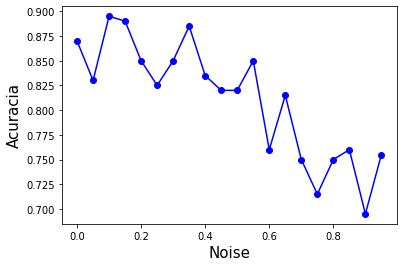

Melhor Noise: 0.1


In [ ]:
####  Realiza a classificacao ####
# Matriz que armazena as probabilidades para cada classe
vscore=[]
#print(P)
for gh in range(0,len(noises)): 
  #print(y[gh])
  P = pd.DataFrame(data=np.zeros((vx_test[gh].shape[0], 2)), columns = classes)
  #print(P[gh])
  vP[gh]=P
  Pc = np.zeros(2) # Armaze a fracao de elementos em cada classe
  vPc[gh]=Pc
  for i in np.arange(0, len(classes)): # Para cada classe
      elements = tuple(np.where(vy_train[gh] == classes[i])) # elmentos na classe i
      elements=elements[0]
      vPc[gh][i] = len(elements)/len(vy_train[gh]) # Probabilidade pertencer a classe i
      #print(vPc[gh][i])
      Z = vx_train[gh][elements,:] # Elementos no conjunto de treinamento
      #print(Z)
      m = np.mean(Z, axis = 0) # Vetor media
      #print(m)
      cv = np.cov(np.transpose(Z)) # Matriz de covariancia
      #print(cv)
      for j in np.arange(0,vx_test[gh].shape[0]): # para cada observacao no conjunto de teste
          x = vx_test[gh][j,:]
          #print(x)
          # calcula a probabilidade pertencer a cada classe
          pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
          vP[gh][classes[i]][j] = pj*vPc[gh][i]
          
  y_pred = [] # Vetor com as classes preditas
  for i in np.arange(0, x_test.shape[0]):
      c = np.argmax(np.array(vP[gh].iloc[i]))
      #print(c)
      y_pred.append(classes[c])
  y_pred = np.array(y_pred)
  # calcula a acuracia
  score = accuracy_score(y_pred, vy_test[gh])
  vscore.append(score)
  #print('Acuracia:', score)
  
plt.subplots_adjust(wspace=1)
plt.show(True)
plt.figure(figsize=(6,4))
plt.plot(noises, vscore, '-bo')
plt.xlabel('Noise', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)
print('Melhor Noise:', noises[best_k])
#plt.figure(figsize=(2,1.34))
#plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
#plt.show(True)


Como é possível notar no Gráfico acima, em via de regra para o modelo Baysiano parametrizado, quanto maior o ruído, menor a acuracia. \\
Porém devemos prestar atencção em que alguns ruidos aumentaram muito a acurancia em 0.5 e o.95.
Talvez ao fato que de acordo com o ruido as classes acabam ficando, de fato, separadas.
\\
Sendo o melhor ruido o de 0.1

Classificador Baysiano não-parametrico

<Figure size 432x288 with 0 Axes>

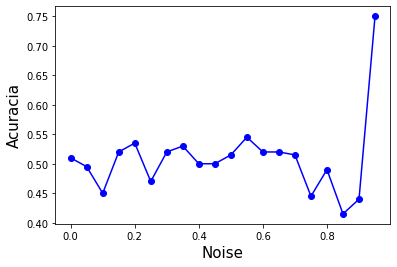

Melhor Noise: 0.9500000000000001


In [ ]:
from sklearn.model_selection import GridSearchCV
vscore=[]

for gh in range(0,len(noises)): 
  # Matriz que armazena as probabilidades para cada classe
  P = pd.DataFrame(data=np.zeros((vx_test[gh].shape[0], 2)), columns = classes)
  #print(P)
  vP[gh]=P
  Pc = np.zeros(2) # Armaze a fracao de elementos em cada classe
  
  vPc[gh]=Pc
  vh = []
  hscore =[]
  for h in range(1,7): # para cada h - Feitos teste não há mais variações de acuracia com h>6
      for i in np.arange(0, len(classes)): # Para cada classe
          elements = tuple(np.where(vy_train[gh] == classes[i])) # elmentos na classe i
          elements=elements[0]
          Pc[i] = len(elements)/len(vy_train[gh]) # Probabilidade pertencer a classe i
          #print(Pc[i])
          Z = vx_train[gh][elements,:] # Elementos no conjunto de treinamento
          #print(Z)
          
          kde = KernelDensity(kernel='gaussian').fit(Z)
         
          for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
              x = vx_test[gh][j,:]
              x = x.reshape((1,len(x)))
              # calcula a probabilidade pertencer a cada classe
              pj = np.exp(kde.score_samples(x)) 
              vP[gh][classes[i]][j] = pj*vPc[gh][i]
             
      y_pred = [] # Vetor com as classes preditas
       
      for i in np.arange(0, x_test.shape[0]):
          #print(i)
          c = np.argmax(np.array(vP[gh].iloc[[i]]))
          #print(np.array(vP[gh].iloc[[i]]))
          y_pred.append(classes[c])
      y_pred = np.array(y_pred)
      # calcula a acuracia
      score = accuracy_score(y_pred, y_test)
      #print('\n h:', h, 'accurace:', score)
      hscore.append(score)
      vh.append(h)
      #print(hscore)

  #plt.figure(figsize=(6,4))
  #plt.plot(vh, hscore, '-bo')
  #plt.xlabel('h', fontsize = 15)
  #plt.ylabel('Acuracia', fontsize = 15)
  #plt.show(True)                
  best_k = np.argmax(hscore)
  #print('Melhor h:', best_k, "no noise: ", noises[gh])
  vscore.append(hscore[best_k]) #salva o melhor Score (variando o H) daquee noise)
plt.subplots_adjust(wspace=1)
plt.show(True)
plt.figure(figsize=(6,4))
plt.plot(noises, vscore, '-bo')
plt.xlabel('Noise', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)
print('Melhor Noise:', noises[best_k])  


Nota-se que para o caso Baysiano não parametrico a acurancia, em geral, não é muito boa. Surpreendetemente molharando quado se aumenta o ruido.

<Figure size 432x288 with 0 Axes>

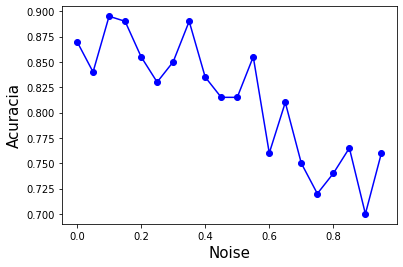

Melhor Noise: 0.1


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
vscore=[]
for gh in range(0,len(noises)):
  model = GaussianNB()
  model.fit(vx_train[gh], vy_train[gh])
  y_pred = model.predict(vx_test[gh])
  score = accuracy_score(y_pred, vy_test[gh])
  #print('Accuracy:', score)
  vscore.append(score)
plt.subplots_adjust(wspace=1)
plt.show(True)
plt.figure(figsize=(6,4))
plt.plot(noises, vscore, '-bo')
plt.xlabel('Noise', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)  
print('Melhor Noise:', noises[best_k])

Com o Naives-Bayes temos uma boa acuracia muito semelhante ao Metodo Baysiano parametrico.

### Exercicio 4

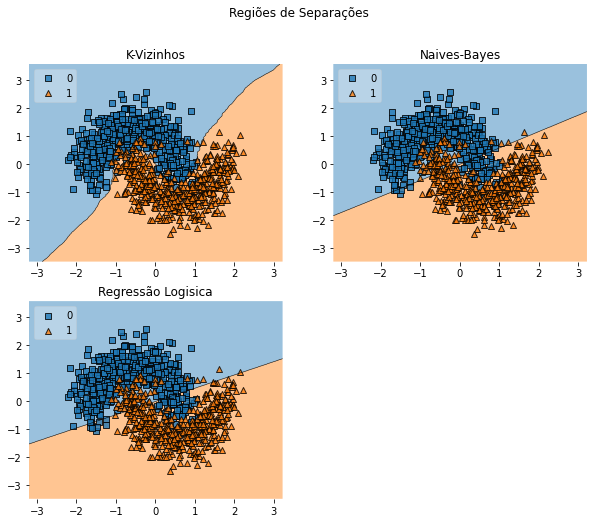

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LogisticRegression
import itertools
import warnings

warnings.filterwarnings("ignore") #ignorar warnings para melhor impressão

#preparando os modelos
parameters = {'n_neighbors': [1,5,10,20,40]}
model = KNeighborsClassifier(metric = 'euclidean') #Procura de um melhoe parametro
clf1 = GridSearchCV(model, parameters, cv = 10)
clf2= GaussianNB()
clf3=LogisticRegression()
i=5 #quantidade de Ruido (Vide Exercicio 3)

#Inicia a plotagem em Grid
fig = plt.figure(figsize=(10,8))
fig.suptitle('Regiões de Separações')
gs = gridspec.GridSpec(2, 2)
label = ["K-Vizinhos", "Naives-Bayes","Regressão Logisica"]

for clf,grd,lab in zip([clf1,clf2,clf3], itertools.product([0, 1], repeat=2),label): 
    clf.fit(X[i], y[i]) #executa os modelos
    # Plotting decision regions
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig=plot_decision_regions(X[i], y[i], clf=clf, legend=2)
    plt.title(lab)
plt.show()

### Exercicio 5

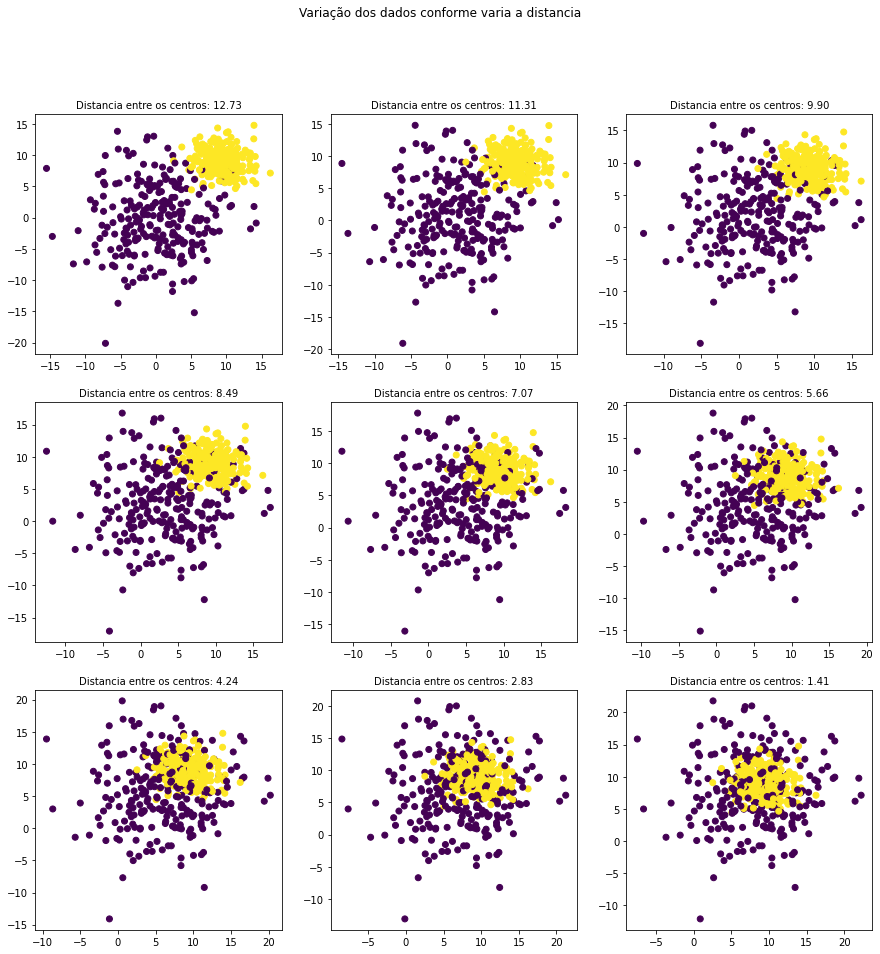

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
n = 500
vX =[] #vetor de X´s
vy=[] #vetor de y´s
distancias = [] #vetor de distancias
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class
#preparando o Grafico de Grids
fig,asato = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.suptitle('Variação dos dados conforme varia a distancia')

for i in range(0,9): #Cria os vetores de variação as distancias e os graficos
  c = [(i,i), (9,9)] #center of the points
  X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c, random_state=402 )
  distancia = distance.euclidean([i,i], [9,9]) #calcula a distancia entre centros
  #Armazenamento nos vetores
  vX.append(X) #Armazena no vetos de X´s
  vy.append(y) #Armazena no Vetor de y´s
  distancias.append(distancia) #armazena no vetor de distancias
  # Plotando os graficos nos Grids
  asato[i//3, i%3].scatter(X[:,0],X[:,1], c=y)
  label="Distancia entre os centros: "+ str(f"{distancia:.2f}")
  asato[i//3, i%3].set_title(label, fontsize=10)
#Exibindo o grafico de Grid
plt.subplots_adjust(wspace=0.2)  
plt.show(True)


In [ ]:
from sklearn.metrics import roc_auc_score
p=0.8
x_train=[]
x_test=[]
y_train=[]
y_test =[]
vX = np.asarray(vX)
vy = np.asarray(vy)
nbscore=[]
bpscore=[]
data1=pd.DataFrame(vX[0])

classes = np.array(pd.unique(data[data1.columns[-1]])) 
#print(len(classes))
#print(vX[0:][0])
#print(distancias)
#preparando o Grafico de Grids

#fig = plt.figure(figsize=(15,15))
#fig.suptitle('Regiões de Separações Conforme a distancia')
#gs = gridspec.GridSpec(3, 3)
for i in range(0, len(distancias)):
  
  scaler = StandardScaler().fit(vX[i])
  vX[i] = scaler.transform(vX[i])
  x_train, x_test, y_train, y_test = train_test_split(vX[i], vy[i], train_size = p, random_state = 402)
  model = GaussianNB()
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  #print(y_pred[:,i])
  score = accuracy_score(y_pred, y_test)
  nbscore.append(score)
  print('\n Accuracia NB:', score)

  ####  Realiza a classificacao Bayesiana Paramétrica ####
  # Matriz que armazena as probabilidades para cada classe
  P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

  Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
  for j in np.arange(0, len(classes)): # Para cada classe
      elements = tuple(np.where(y_train == classes[j])) # elmentos na classe i
      elements=elements[0]
      Pc[j] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
      Z = x_train[elements,:] # Elementos no conjunto de treinamento
      m = np.mean(Z, axis = 0) # Vetor media
      cv = np.cov(np.transpose(Z)) # Matriz de covariancia
      for ij in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
          x = x_test[ij,:]
          # calcula a probabilidade pertencer a cada classe
          pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
          P[classes[j]][ij] = pj*Pc[j]
          
  y_pred = [] # Vetor com as classes preditas
  for j in np.arange(0, x_test.shape[0]):
      c = np.argmax(np.array(P.iloc[[j]]))
      y_pred.append(classes[c])
  y_pred = np.array(y_pred)
  # calcula a acuracia
  score = accuracy_score(y_pred, y_test)
  bpscore.append(score)
  print('Acuracia Bayes:', score)
  #print("\n Area ROC Bayes",roc_auc_score(vy,score) )
  print()
  
   # Plotando os graficos nos Grids
  #ax = plt.subplot(gs[i//3, i%3])
  #asato[i//3, i%3].scatter(x_test[:,0],x_test[:,1], c=y_pred)
  #fig=plot_decision_regions(vX[i], vy[i], clf=model)
  #label="Distancia entre os centros: "+ str(f"{distancias[i]:.2f}")
  #ax=plt.title(label, fontsize=10)
#Exibindo o grafico de Grid
#sklearn.metrics.roc_auc_score(vX,bpscore)
#plt.subplots_adjust(wspace=0.2)  
#plt.show(True)


 Accuracia NB: 0.98
Acuracia Bayes: 0.98


 Accuracia NB: 0.97
Acuracia Bayes: 0.97


 Accuracia NB: 0.94
Acuracia Bayes: 0.94


 Accuracia NB: 0.92
Acuracia Bayes: 0.92


 Accuracia NB: 0.87
Acuracia Bayes: 0.86


 Accuracia NB: 0.83
Acuracia Bayes: 0.83


 Accuracia NB: 0.85
Acuracia Bayes: 0.84


 Accuracia NB: 0.83
Acuracia Bayes: 0.82


 Accuracia NB: 0.81
Acuracia Bayes: 0.83



###Exercico 6

<Figure size 432x288 with 0 Axes>

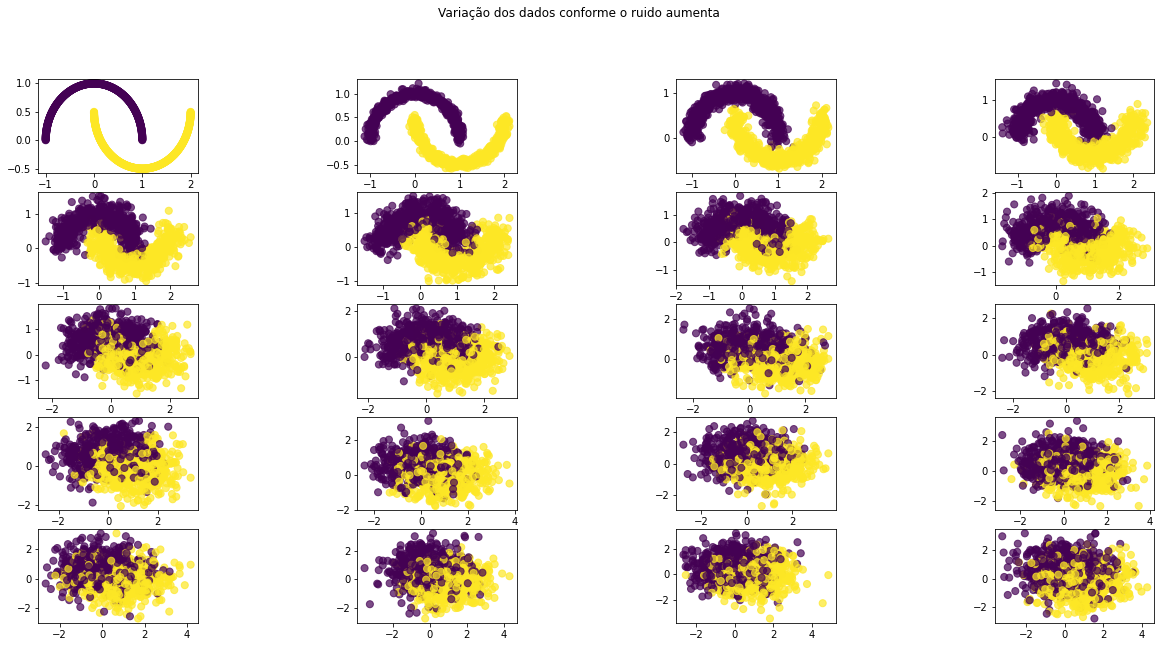

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
random.seed(2016) # define the seed (important to reproduce the results)
plt.figure(figsize=(6,4))
n_samples = 1000
noises =[]
i=0
X=[]
y=[]
for noise in np.arange(0, 1, 0.05):
  data = datasets.make_moons(n_samples=n_samples, noise=noise)
  X.append(data[0])
  y.append(data[1])
  noises.append(noise)
  
  i=i+1

i=0
fig,asato = plt.subplots(nrows=5, ncols=4, figsize=(20,10))
fig.suptitle('Variação dos dados conforme o ruido aumenta')
#grid = fig.add_gridspec(4, 5, hspace=0, wspace=0) 
for i in range (0,20):
  #print(i)
  #print(i//4, i%4)
  asato[i//4, i%4].scatter(X[i][:,0], X[i][:,1], c=y[i], cmap='viridis', s=50, alpha=0.7)
      #axs[j,w].scatter(X[i][:,0], X[i][:,1], c=y[i], cmap='viridis', s=50, alpha=0.7)

plt.subplots_adjust(wspace=1)
plt.show(True)
#print(data)
# Converte para matriz e vetor do numpy
data1=pd.DataFrame(data[0])
#print(data1)
classes = np.array(pd.unique(data[data1.columns[-1]]))  

#Separa os dados para treinamento
vx_train=[]
vx_test=[]
vy_train=[]
vy_test=[]
vP=[]
vPc=[]
X = np.asarray(X)
y = np.asarray(y)
#print(X)
for i in range(0,len(noises)):
  # Transforma os dados para terem media igual a zero e variancia igual a 1
  scaler = StandardScaler().fit(X[i])
  X[i] = scaler.transform(X[i])
  #print(X[)
  # Seleciona os conjuntos de treinamento e teste
  p = 0.8 # fraction of elements in the training set
  x_train, x_test, y_train, y_test = train_test_split(X[i], y[i], train_size = p, random_state = 402)
  vx_train.append(x_train)
  vx_test.append(x_test)
  vy_train.append(y_train)
  vy_test.append(y_test)
  # Matriz que armazena as probabilidades para cada classe
  P = pd.DataFrame(data=np.zeros((x_test.shape[0], 2)), columns = classes) 
  vP.append(P)
  Pc = np.zeros(2) # Armaze a fracao de elementos em cada classe
  vPc.append(Pc)

<Figure size 432x288 with 0 Axes>

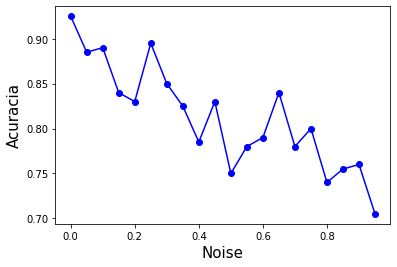

Melhor Noise: 0.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
vscore=[]
for gh in range(0,len(noises)):
  model = GaussianNB()
  model.fit(vx_train[gh], vy_train[gh])
  y_pred = model.predict(vx_test[gh])
  score = accuracy_score(y_pred, vy_test[gh])
  #print('Accuracy:', score)
  vscore.append(score)
plt.subplots_adjust(wspace=1)
plt.show(True)
plt.figure(figsize=(6,4))
plt.plot(noises, vscore, '-bo')
plt.xlabel('Noise', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)  
print('Melhor Noise:', noises[best_k])

<Figure size 432x288 with 0 Axes>

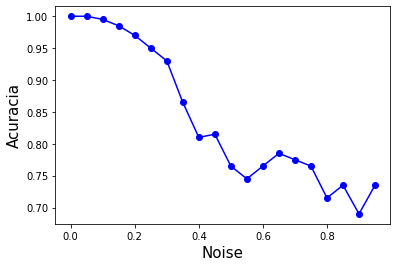

Melhor Noise: 0.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
vscore=[]
for gh in range(0,len(noises)):
  parameters={'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
  model = KNeighborsClassifier(metric = 'euclidean')
  best_model = GridSearchCV(model, parameters, cv = 10)
  best_model.fit(vx_train[gh], vy_train[gh])
  y_pred = best_model.predict(vx_test[gh])
  score = accuracy_score(y_pred, vy_test[gh])
  #print('Accuracy:', score)
  vscore.append(score)
plt.subplots_adjust(wspace=1)
plt.show(True)
plt.figure(figsize=(6,4))
plt.plot(noises, vscore, '-bo')
plt.xlabel('Noise', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)  
print('Melhor Noise:', noises[best_k])

<Figure size 432x288 with 0 Axes>

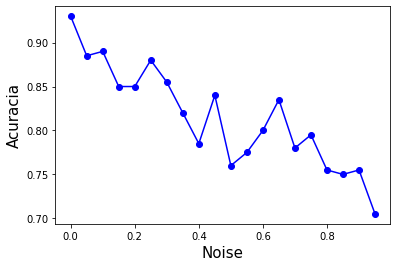

Melhor Noise: 0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
vscore=[]
for gh in range(0,len(noises)):
  
  model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

  model.fit(vx_train[gh], vy_train[gh])
  y_pred = model.predict(vx_test[gh])
  score = accuracy_score(y_pred, vy_test[gh])
  #print('Accuracy:', score)
  vscore.append(score)
plt.subplots_adjust(wspace=1)
plt.show(True)
plt.figure(figsize=(6,4))
plt.plot(noises, vscore, '-bo')
plt.xlabel('Noise', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)  
print('Melhor Noise:', noises[best_k])

### Exercicio 7